In [14]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import random
import string

def generate_realistic_ecommerce_data():
    """
    生成符合真实业务场景的电商数据
    """
    
    # 设置随机种子保证可重复性
    np.random.seed(42)
    random.seed(42)
    
    print("正在生成电商数据...")
    
    # 1. 用户维度表
    n_customers = 5000
    customers_data = []
    
    for i in range(1, n_customers + 1):
        # 生成一些缺失值
        has_email = random.random() > 0.05
        has_phone = random.random() > 0.07
        has_birth_year = random.random() > 0.03
        
        # 生成一些异常值
        if has_birth_year:
            if random.random() < 0.02:
                birth_year = random.choice([1800, 1850, 1900, 2025, 2030])
            else:
                birth_year = np.random.randint(1970, 2005)
        else:
            birth_year = None
        
        # 数据格式不一致
        gender_options = ['Male', 'Female', 'male', 'female', 'M', 'F', '未知', '']
        gender = random.choice(gender_options)
        
        email = f'user{i}@example.com' if has_email else None
        if not has_email and random.random() < 0.01:
            email = f'invalid_email_{i}'
        
        phone = f'1{np.random.randint(300,999):03d}{np.random.randint(1000,9999):04d}' if has_phone else None
        
        # 重复数据
        customer_id = i
        if random.random() < 0.005 and i > 100:
            customer_id = random.randint(1, 100)
        
        # 不一致的数据
        countries = ['USA', 'US', 'United States', '美国', '', 'CANADA', 'UK', 'GB', 'Australia', 'AU']
        cities = ['New York', 'NY', 'New York City', '纽约', 'Los Angeles', 'LA', 'London', 'LON', 'Sydney', 'SYD']
        
        customers_data.append({
            'customer_id': customer_id,
            'customer_name': random.choice([f'User_{i}', f'user {i}', f'USER-{i}', f'用户{i}']),
            'gender': gender,
            'birth_year': birth_year,
            'registration_date': pd.to_datetime([datetime(2020,1,1) + timedelta(days=np.random.randint(0, 1460)) for _ in range(1)])[0],
            'email': email,
            'phone': phone,
            'country': random.choice(countries),
            'city': random.choice(cities),
            'zip_code': random.choice([f'{np.random.randint(10000, 99999)}', '00000', 'N/A', '']),
            'registration_channel': random.choice(['Web', 'Mobile App', 'Social Media', 'Referral', 'web', 'mobile', '']),
            'loyalty_tier': random.choice(['Bronze', 'Silver', 'Gold', 'Platinum', 'bronze', 'silver', '', 'VIP']),
            'preferred_category': random.choice(['Electronics', 'Clothing', 'Home', 'Books', 'Sports', '']),
            'avg_order_value_segment': random.choice(['Low', 'Medium', 'High', 'low', 'medium', 'high', '']),
            'last_login_date': None,
            'total_orders': 0,
            'total_spent': 0.0
        })
    
    customers = pd.DataFrame(customers_data)
    
    # 2. 商品维度表
    n_products = 200
    categories = {
        'Electronics': ['Smartphone', 'Laptop', 'Tablet', 'Headphones', 'Smartwatch'],
        'Clothing': ['T-Shirt', 'Jeans', 'Dress', 'Jacket', 'Shoes'],
        'Home': ['Furniture', 'Kitchenware', 'Decor', 'Lighting', 'Bedding'],
        'Books': ['Fiction', 'Non-Fiction', 'Academic', 'Children', 'Cookbook'],
        'Sports': ['Equipment', 'Apparel', 'Footwear', 'Accessories']
    }
    
    products_data = []
    product_id = 1
    
    for category, subcategories in categories.items():
        for subcategory in subcategories:
            for i in range(n_products // (len(categories) * len(subcategories))):
                if random.random() < 0.03:
                    price = random.choice([-100, -50, 0, 0.01, 999999])
                else:
                    price = round(np.random.uniform(10, 500), 2)
                
                if random.random() < 0.02:
                    stock_quantity = random.choice([-100, -10, 1000000])
                else:
                    stock_quantity = np.random.randint(0, 1000)
                
                has_brand = random.random() > 0.04
                has_supplier = random.random() > 0.05
                
                rating_options = [round(np.random.uniform(3.0, 5.0), 1), 'N/A', '', '五星', 0, 6.0]
                rating = random.choice(rating_options)
                
                products_data.append({
                    'product_id': product_id,
                    'product_name': random.choice([
                        f'{subcategory} Model {product_id}',
                        f'{subcategory.lower()} {product_id}',
                        f'{subcategory} {product_id}',
                        f'{product_id}{subcategory}'
                    ]),
                    'category': random.choice([category, category.lower(), category.upper(), '']),
                    'subcategory': subcategory,
                    'brand': random.choice(['BrandA', 'BrandB', 'BrandC', 'BrandD', 'BrandE', '']) if has_brand else None,
                    'price': price,
                    'cost_price': round(np.random.uniform(5, 300), 2) if price > 0 else None,
                    'stock_quantity': stock_quantity,
                    'supplier': f'Supplier_{np.random.randint(1, 20)}' if has_supplier else None,
                    'rating': rating,
                    'review_count': np.random.randint(0, 500),
                    'created_date': pd.to_datetime(datetime(2021,1,1) + timedelta(days=np.random.randint(0, 1000))),
                    'is_active': random.choice([True, False, 'Y', 'N', 1, 0])
                })
                product_id += 1
    
    products = pd.DataFrame(products_data)
    
    # 3. 时间维度表 - 修复概率之和问题
    dates = pd.date_range('2022-01-01', '2024-12-31', freq='D')
    time_dim_data = []
    
    for date in dates:
        if random.random() < 0.01:
            day_name = random.choice(['星期一', 'Monday', 'MON', ''])
        else:
            day_name = date.strftime('%A')
        
        month_name = date.strftime('%B')
        if random.random() < 0.005:
            month_name = random.choice(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                        'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', ''])
        
        # 修复这里：不要使用.astype(int)，直接使用int()
        correct_is_weekend = 1 if date.dayofweek >= 5 else 0
        
        # 有10%的概率生成错误的值
        if random.random() < 0.1:
            # 错误的值选项
            wrong_choices = [0, 1, 'Y', 'N', '']
            # 移除正确的值，确保生成的是错误的值
            if correct_is_weekend in wrong_choices:
                wrong_choices.remove(correct_is_weekend)
            is_weekend = random.choice(wrong_choices) if wrong_choices else correct_is_weekend
        else:
            is_weekend = correct_is_weekend
        
        # 修复概率之和问题：确保总和为1
        holiday_options = [0, 1, '是', '否', '']
        holiday_probs = [0.8, 0.05, 0.05, 0.05, 0.05]  # 总和为1.0
        
        time_dim_data.append({
            'date': date,
            'day': date.day,
            'month': date.month,
            'month_name': month_name,
            'quarter': date.quarter,
            'year': date.year,
            'day_of_week': date.dayofweek,
            'day_name': day_name,
            'is_weekend': is_weekend,
            'is_holiday': np.random.choice(holiday_options, p=holiday_probs)
        })
    
    time_dim = pd.DataFrame(time_dim_data)
    
    # 4. 地区维度表
    regions = pd.DataFrame({
        'region_id': range(1, 7),
        'region_name': ['North America', 'Europe', 'Asia Pacific', 'South America', 'Africa', 'Middle East'],
        'region_manager': ['Manager_A', 'Manager_B', 'Manager_C', 'Manager_D', 'Manager_E', 'Manager_F']
    })
    
    # 5. 订单事实表
    n_orders = 50000
    orders_data = []
    
    for i in range(1, n_orders + 1):
        if random.random() < 0.005:
            customer_id = np.random.randint(5001, 6000)
        else:
            customer_id = np.random.randint(1, n_customers + 1)
        
        if random.random() < 0.003:
            product_id = np.random.randint(201, 300)
        else:
            product_id = np.random.randint(1, len(products) + 1)
        
        if random.random() < 0.01:
            order_date = pd.to_datetime(random.choice([
                '2020-01-01',
                '2025-12-31',
                '1900-01-01',
                datetime(2023,1,1) + timedelta(days=np.random.randint(-365, 0))
            ]))
        else:
            order_date = pd.to_datetime(datetime(2023,1,1) + timedelta(days=np.random.randint(0, 730)))
        
        if random.random() < 0.02:
            quantity = random.choice([0, -1, -5, 1000])
        else:
            quantity = np.random.randint(1, 6)
        
        try:
            price_row = products.loc[products['product_id'] == product_id, 'price']
            if len(price_row) > 0:
                price = price_row.values[0]
                if price <= 0:
                    amount = random.choice([0, -abs(quantity * 10), quantity * 1000])
                else:
                    amount = quantity * price
            else:
                price = np.random.uniform(10, 500)
                amount = quantity * price
        except:
            price = np.random.uniform(10, 500)
            amount = quantity * price
        
        if random.random() < 0.01:
            amount = random.choice([price, quantity, price * quantity * 2, price * quantity / 2, 0])
        
        if random.random() < 0.005:
            amount = -abs(amount)
        
        has_payment_method = random.random() > 0.03
        has_shipping_method = random.random() > 0.04
        
        payment_options = ['Credit Card', 'credit card', 'CC', 'PayPal', 'paypal', 'Apple Pay', 'Google Pay', '现金', '']
        shipping_options = ['Standard', 'standard', 'STD', 'Express', 'express', 'Next Day', 'next day', '']
        status_options = ['Completed', 'completed', 'Shipped', 'shipped', 'Processing', 'processing', 
                         'Cancelled', 'cancelled', '待处理', '已取消', '']
        
        browsing_duration = np.random.randint(10, 1800)
        if random.random() < 0.02:
            browsing_duration = random.choice([0, 1, 100000, -100])
        
        click_count = np.random.randint(1, 20)
        if random.random() < 0.01:
            click_count = random.choice([0, -1, 1000])
        
        orders_data.append({
            'order_id': i,
            'customer_id': customer_id,
            'product_id': product_id,
            'order_date': order_date,
            'quantity': quantity,
            'unit_price': price,
            'amount': amount,
            'region_id': np.random.randint(1, 7),
            'payment_method': random.choice(payment_options) if has_payment_method else None,
            'shipping_method': random.choice(shipping_options) if has_shipping_method else None,
            'order_status': random.choice(status_options),
            'browsing_duration_seconds': browsing_duration,
            'click_count': click_count,
            'add_to_cart_count': np.random.randint(0, 5),
            'wishlist_added': random.choice([0, 1, 'Y', 'N', True, False]),
            'discount_applied': round(np.random.uniform(0, 0.3), 2),
            'customer_rating': random.choice([1, 2, 3, 4, 5, 0, 6, '五星', '']),
            'return_requested': random.choice([0, 1, 'Y', 'N'])
        })
    
    orders = pd.DataFrame(orders_data)
    
    # 6. 更新用户表中的聚合信息
    try:
        customer_stats = orders.groupby('customer_id').agg({
            'order_id': 'count',
            'amount': 'sum',
            'order_date': 'max'
        }).reset_index()
        
        customer_stats.columns = ['customer_id', 'total_orders_new', 'total_spent_new', 'last_order_date']
        
        customers = customers.merge(customer_stats, on='customer_id', how='left')
        
        customers['total_orders'] = customers['total_orders_new'].fillna(0)
        customers['total_spent'] = customers['total_spent_new'].fillna(0.0)
        
        mask = np.random.random(len(customers)) < 0.01
        customers.loc[mask, 'total_orders'] = -1
        customers.loc[mask, 'total_spent'] = -1000
        
        customers['last_login_date'] = customers['last_order_date']
        
        customers = customers.drop(['total_orders_new', 'total_spent_new'], axis=1)
    except Exception as e:
        print(f"更新客户统计信息时出错: {e}")
        customers['total_orders'] = 0
        customers['total_spent'] = 0.0
        customers['last_login_date'] = None
    
    # 7. 用户行为日志表
    n_behavior_logs = 100000
    behavior_logs_data = []
    
    for i in range(1, n_behavior_logs + 1):
        if random.random() < 0.01:
            customer_id = np.random.randint(5001, 6000)
        else:
            customer_id = np.random.randint(1, n_customers + 1)
        
        if random.random() < 0.008:
            product_id = np.random.randint(201, 300)
        else:
            product_id = np.random.randint(1, len(products) + 1)
        
        if random.random() < 0.01:
            timestamp = pd.to_datetime(random.choice([
                '2020-01-01',
                '2025-12-31',
                '1900-01-01',
                datetime.now() + timedelta(days=365)
            ]))
        else:
            timestamp = pd.to_datetime(datetime(2024,1,1) + timedelta(seconds=np.random.randint(0, 31536000)))
        
        has_device_type = random.random() > 0.05
        has_browser = random.random() > 0.06
        
        behavior_options = ['view', 'click', 'add_to_cart', 'purchase', 'wishlist', 'VIEW', 'CLICK', '浏览', '']
        device_options = ['Desktop', 'Mobile', 'Tablet', 'desktop', 'mobile', 'tablet', 'PC', '手机', '']
        browser_options = ['Chrome', 'Safari', 'Firefox', 'Edge', 'chrome', 'safari', 'firefox', 'edge', '浏览器', '']
        
        behavior_logs_data.append({
            'log_id': i,
            'customer_id': customer_id,
            'product_id': product_id,
            'behavior_type': random.choice(behavior_options),
            'timestamp': timestamp,
            'session_id': random.choice([f'session_{np.random.randint(1, 10000)}', 
                                        f'SESSION-{np.random.randint(1, 10000)}',
                                        f'sess_{np.random.randint(1, 10000)}',
                                        '']),
            'device_type': random.choice(device_options) if has_device_type else None,
            'browser': random.choice(browser_options) if has_browser else None
        })
    
    behavior_logs = pd.DataFrame(behavior_logs_data)
    
    # 8. 添加重复数据
    n_duplicate_orders = int(n_orders * 0.003)
    if n_duplicate_orders > 0:
        duplicate_indices = np.random.choice(orders.index, n_duplicate_orders, replace=False)
        duplicates = orders.loc[duplicate_indices].copy()
        for idx, row in duplicates.iterrows():
            if random.random() < 0.5:
                row['order_id'] = row['order_id'] + 1000000
        orders = pd.concat([orders, duplicates], ignore_index=True)
    
    n_duplicate_logs = int(n_behavior_logs * 0.005)
    if n_duplicate_logs > 0:
        duplicate_indices = np.random.choice(behavior_logs.index, n_duplicate_logs, replace=False)
        duplicates = behavior_logs.loc[duplicate_indices].copy()
        behavior_logs = pd.concat([behavior_logs, duplicates], ignore_index=True)
    
    # 9. 添加格式不一致的数据
    date_formats = ['2020-01-01', '01/01/2020', '2020.01.01', 'Jan 1, 2020', '20200101']
    for i in range(int(len(customers) * 0.01)):
        idx = np.random.randint(0, len(customers))
        customers.at[idx, 'registration_date'] = random.choice(date_formats)
    
    for i in range(int(len(orders) * 0.005)):
        idx = np.random.randint(0, len(orders))
        orders.at[idx, 'amount'] = f"${orders.at[idx, 'amount']}"
    
    # 10. 添加空格问题
    for i in range(int(len(customers) * 0.02)):
        idx = np.random.randint(0, len(customers))
        customers.at[idx, 'customer_name'] = f"  {customers.at[idx, 'customer_name']}  "
    
    for i in range(int(len(products) * 0.01)):
        idx = np.random.randint(0, len(products))
        products.at[idx, 'product_name'] = f" {products.at[idx, 'product_name']} "
    
    print("数据生成完成！")
    
    return {
        'customers': customers,
        'products': products,
        'time_dim': time_dim,
        'regions': regions,
        'orders': orders,
        'behavior_logs': behavior_logs
    }

# 生成数据
data_dict = generate_realistic_ecommerce_data()

# 保存数据到CSV文件
for table_name, table_data in data_dict.items():
    table_data.to_csv(f'{table_name}.csv', index=False, encoding='utf-8-sig')
    print(f"✅ 已保存: {table_name}.csv ({len(table_data)} 行)")

print("\n🎯 所有数据已生成并保存为CSV文件！")

正在生成电商数据...
数据生成完成！
✅ 已保存: customers.csv (5000 行)
✅ 已保存: products.csv (200 行)
✅ 已保存: time_dim.csv (1096 行)
✅ 已保存: regions.csv (6 行)
✅ 已保存: orders.csv (50150 行)
✅ 已保存: behavior_logs.csv (100500 行)

🎯 所有数据已生成并保存为CSV文件！


🔍 Starting Data Quality Check...
✅ Loaded: customers.csv (5000 rows)
✅ Loaded: products.csv (200 rows)
✅ Loaded: time_dim.csv (1096 rows)
✅ Loaded: regions.csv (6 rows)
✅ Loaded: orders.csv (50150 rows)
✅ Loaded: behavior_logs.csv (100500 rows)

📊 Basic Quality Statistics
   Table Name   Rows  Columns  Missing Values Missing %  Duplicate Rows Duplicate % Memory (MB)
    customers   5000       18            7298     8.11%               0       0.00%        3.47
     products    200       13             175     6.73%               0       0.00%        0.09
     time_dim   1096       10              71     0.65%               0       0.00%        0.33
      regions      6        3               0     0.00%               0       0.00%        0.00
       orders  50150       18           25246     2.80%             150       0.30%       24.46
behavior_logs 100500        8           67405     8.38%             500       0.50%       29.90

🔍 Detailed Table Analysis

📋 CUSTOMERS Table
---------

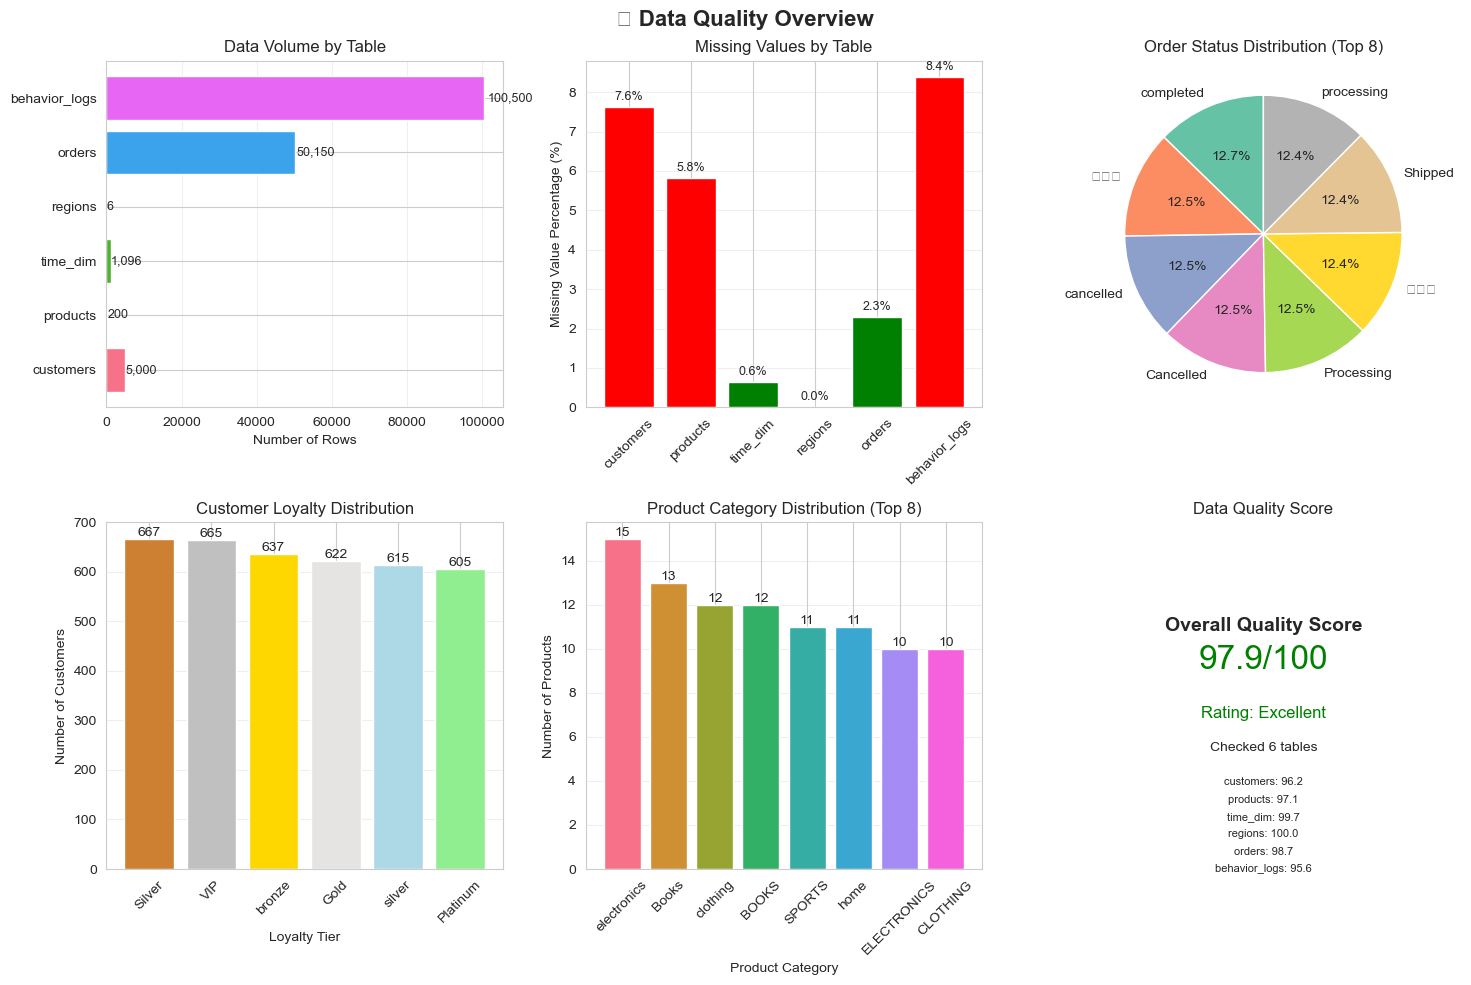


✅ Data Quality Check Completed!

📋 Summary Report
Data Scale: 156,952 rows × 78 columns
Total Issues Found: 101,163
Issue Density: 0.83%

💡 Found the following data quality issues:
  - Missing values (NULL/NaN)
  - Duplicate data
  - Outliers (negative, zero, extreme values)
  - Mixed data types
  - Inconsistent formats
  - Referential integrity issues
  - Business logic errors


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# 设置可视化样式
plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'Arial', 'Helvetica']
plt.rcParams['axes.unicode_minus'] = False
sns.set_style("whitegrid")

print("🔍 Starting Data Quality Check...")
print("="*70)

# 加载数据
data_dict = {}
tables = ['customers', 'products', 'time_dim', 'regions', 'orders', 'behavior_logs']

for table in tables:
    try:
        data_dict[table] = pd.read_csv(f'{table}.csv')
        print(f"✅ Loaded: {table}.csv ({len(data_dict[table])} rows)")
    except FileNotFoundError:
        print(f"❌ Not found: {table}.csv")

print("="*70)

# 1. 基础质量统计
print("\n📊 Basic Quality Statistics")
print("="*70)

summary_data = []
for table_name, df in data_dict.items():
    missing_total = df.isnull().sum().sum()
    duplicate_rows = df.duplicated().sum()
    
    summary = {
        'Table Name': table_name,
        'Rows': len(df),
        'Columns': len(df.columns),
        'Missing Values': missing_total,
        'Missing %': f"{(missing_total / (len(df) * len(df.columns)) * 100):.2f}%",
        'Duplicate Rows': duplicate_rows,
        'Duplicate %': f"{(duplicate_rows / len(df) * 100):.2f}%",
        'Memory (MB)': f"{df.memory_usage(deep=True).sum() / (1024*1024):.2f}"
    }
    summary_data.append(summary)

summary_df = pd.DataFrame(summary_data)
print(summary_df.to_string(index=False))

# 2. 各表详细检查
print("\n🔍 Detailed Table Analysis")
print("="*70)

for table_name, df in data_dict.items():
    print(f"\n📋 {table_name.upper()} Table")
    print("-"*50)
    
    # 缺失值分析
    missing_counts = df.isnull().sum()
    missing_cols = missing_counts[missing_counts > 0]
    
    if len(missing_cols) > 0:
        print("❌ Missing Values Analysis:")
        for col, count in missing_cols.items():
            pct = (count / len(df)) * 100
            print(f"   {col:25s}: {count:6d} ({pct:.1f}%)")
    else:
        print("✅ No missing values")
    
    # 重复行
    duplicate_rows = df.duplicated().sum()
    if duplicate_rows > 0:
        pct = (duplicate_rows / len(df)) * 100
        print(f"❌ Duplicate rows: {duplicate_rows} ({pct:.1f}%)")
    else:
        print("✅ No duplicate rows")
    
    # 数据类型问题
    type_issues = []
    for col in df.columns:
        if df[col].dtype == 'object':
            try:
                pd.to_numeric(df[col], errors='raise')
            except:
                unique_types = df[col].apply(type).unique()
                if len(unique_types) > 1:
                    type_issues.append(col)
    
    if type_issues:
        print(f"⚠️  Mixed data type columns: {', '.join(type_issues[:5])}")
        if len(type_issues) > 5:
            print(f"     ... and {len(type_issues) - 5} more columns")

# 3. 业务逻辑检查
print("\n📋 Business Logic Checks")
print("="*70)

if 'orders' in data_dict:
    orders = data_dict['orders']
    
    # 金额计算检查
    try:
        # 清理金额格式
        orders['amount_clean'] = orders['amount'].replace('[\$,]', '', regex=True).astype(float)
        orders['unit_price_clean'] = pd.to_numeric(orders['unit_price'], errors='coerce')
        orders['quantity_clean'] = pd.to_numeric(orders['quantity'], errors='coerce')
        
        calculated = orders['unit_price_clean'] * orders['quantity_clean']
        diff = abs(orders['amount_clean'] - calculated)
        calc_errors = (diff > 0.01).sum()
        
        if calc_errors > 0:
            print(f"❌ Order amount calculation errors: {calc_errors} ({calc_errors/len(orders)*100:.1f}%)")
        else:
            print("✅ Order amount calculations are correct")
    except Exception as e:
        print(f"⚠️  Cannot check amount calculations: {str(e)[:50]}")
    
    # 订单日期检查
    try:
        orders['order_date_dt'] = pd.to_datetime(orders['order_date'], errors='coerce')
        invalid_dates = orders['order_date_dt'].isna().sum()
        future_orders = (orders['order_date_dt'] > pd.Timestamp('2024-12-31')).sum()
        early_orders = (orders['order_date_dt'] < pd.Timestamp('2023-01-01')).sum()
        
        if invalid_dates > 0:
            print(f"❌ Invalid order dates: {invalid_dates}")
        if future_orders > 0:
            print(f"❌ Future orders: {future_orders}")
        if early_orders > 0:
            print(f"❌ Early orders (before 2023): {early_orders}")
    except Exception as e:
        print(f"⚠️  Cannot check order dates: {str(e)[:50]}")
    
    # 异常值检查
    negative_amount = (orders['amount_clean'] < 0).sum() if 'amount_clean' in orders.columns else 0
    zero_quantity = (orders['quantity_clean'] <= 0).sum() if 'quantity_clean' in orders.columns else 0
    
    if negative_amount > 0:
        print(f"❌ Negative amount orders: {negative_amount}")
    if zero_quantity > 0:
        print(f"❌ Zero or negative quantity orders: {zero_quantity}")

if 'customers' in data_dict:
    customers = data_dict['customers']
    
    # 年龄检查
    if 'birth_year' in customers.columns:
        current_year = datetime.now().year
        customers['birth_year_clean'] = pd.to_numeric(customers['birth_year'], errors='coerce')
        customers['age'] = current_year - customers['birth_year_clean']
        
        invalid_ages = ((customers['age'] < 10) | (customers['age'] > 100) | customers['age'].isna()).sum()
        if invalid_ages > 0:
            print(f"❌ Unreasonable age customers: {invalid_ages} ({invalid_ages/len(customers)*100:.1f}%)")
        else:
            print("✅ Customer ages are reasonable")

if 'products' in data_dict:
    products = data_dict['products']
    
    # 价格检查
    if 'price' in products.columns:
        products['price_clean'] = pd.to_numeric(products['price'], errors='coerce')
        invalid_prices = (products['price_clean'] <= 0).sum()
        if invalid_prices > 0:
            print(f"❌ Invalid product prices: {invalid_prices} ({invalid_prices/len(products)*100:.1f}%)")
        else:
            print("✅ Product prices are valid")
    
    # 库存检查
    if 'stock_quantity' in products.columns:
        products['stock_clean'] = pd.to_numeric(products['stock_quantity'], errors='coerce')
        negative_stock = (products['stock_clean'] < 0).sum()
        if negative_stock > 0:
            print(f"❌ Negative stock products: {negative_stock}")
        else:
            print("✅ Stock quantities are valid")

# 4. 引用完整性检查
print("\n🔗 Referential Integrity Checks")
print("="*70)

if 'orders' in data_dict and 'customers' in data_dict:
    orders_customers = set(data_dict['orders']['customer_id'].unique())
    customers_set = set(data_dict['customers']['customer_id'].unique())
    missing_customers = orders_customers - customers_set
    
    if missing_customers:
        print(f"❌ Orders reference non-existent customers: {len(missing_customers)}")
    else:
        print("✅ Order-customer referential integrity is good")

if 'orders' in data_dict and 'products' in data_dict:
    orders_products = set(data_dict['orders']['product_id'].unique())
    products_set = set(data_dict['products']['product_id'].unique())
    missing_products = orders_products - products_set
    
    if missing_products:
        print(f"❌ Orders reference non-existent products: {len(missing_products)}")
    else:
        print("✅ Order-product referential integrity is good")

# 5. 可视化图表
print("\n📈 Generating Visualization Charts...")
print("="*70)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('📊 Data Quality Overview', fontsize=16, fontweight='bold')

# 1. 各表数据量对比
ax1 = axes[0, 0]
table_names = list(data_dict.keys())
row_counts = [len(df) for df in data_dict.values()]

bars1 = ax1.barh(table_names, row_counts, color=sns.color_palette("husl", len(table_names)))
ax1.set_xlabel('Number of Rows')
ax1.set_title('Data Volume by Table')
ax1.grid(axis='x', alpha=0.3)

for bar, count in zip(bars1, row_counts):
    width = bar.get_width()
    ax1.text(width * 1.01, bar.get_y() + bar.get_height()/2, 
            f'{count:,}', ha='left', va='center', fontsize=9)

# 2. 各表缺失值比例
ax2 = axes[0, 1]
missing_pcts = []
for df in data_dict.values():
    missing_count = df.isnull().sum().sum()
    missing_pct = (missing_count / (len(df) * len(df.columns)) * 100) if len(df) > 0 else 0
    missing_pcts.append(missing_pct)

colors2 = ['red' if pct > 5 else 'green' for pct in missing_pcts]
bars2 = ax2.bar(table_names, missing_pcts, color=colors2)
ax2.set_ylabel('Missing Value Percentage (%)')
ax2.set_title('Missing Values by Table')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(axis='y', alpha=0.3)

for bar, pct in zip(bars2, missing_pcts):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2, height + 0.1, 
            f'{pct:.1f}%', ha='center', va='bottom', fontsize=9)

# 3. 订单状态分布
ax3 = axes[0, 2]
if 'orders' in data_dict:
    orders = data_dict['orders']
    status_counts = orders['order_status'].value_counts().head(8)
    
    if len(status_counts) > 0:
        wedges, texts, autotexts = ax3.pie(status_counts.values, 
                                         labels=status_counts.index,
                                         autopct='%1.1f%%',
                                         startangle=90,
                                         colors=sns.color_palette("Set2", len(status_counts)))
        ax3.set_title('Order Status Distribution (Top 8)')
    else:
        ax3.text(0.5, 0.5, 'No order status data', ha='center', va='center', fontsize=14)
        ax3.set_title('Order Status Distribution')
else:
    ax3.text(0.5, 0.5, 'No orders data', ha='center', va='center', fontsize=14)
    ax3.set_title('Order Status Distribution')

# 4. 客户忠诚度分布
ax4 = axes[1, 0]
if 'customers' in data_dict:
    customers = data_dict['customers']
    if 'loyalty_tier' in customers.columns:
        loyalty_counts = customers['loyalty_tier'].value_counts().head(6)
        
        if len(loyalty_counts) > 0:
            colors4 = ['#CD7F32', '#C0C0C0', '#FFD700', '#E5E4E2', '#ADD8E6', '#90EE90'][:len(loyalty_counts)]
            bars4 = ax4.bar(range(len(loyalty_counts)), loyalty_counts.values, color=colors4)
            ax4.set_xlabel('Loyalty Tier')
            ax4.set_ylabel('Number of Customers')
            ax4.set_title('Customer Loyalty Distribution')
            ax4.set_xticks(range(len(loyalty_counts)))
            ax4.set_xticklabels(loyalty_counts.index, rotation=45)
            ax4.grid(axis='y', alpha=0.3)
            
            for bar, count in zip(bars4, loyalty_counts.values):
                height = bar.get_height()
                ax4.text(bar.get_x() + bar.get_width()/2, height, 
                        f'{count:,}', ha='center', va='bottom')
        else:
            ax4.text(0.5, 0.5, 'No loyalty data', ha='center', va='center', fontsize=14)
            ax4.set_title('Customer Loyalty Distribution')
    else:
        ax4.text(0.5, 0.5, 'No loyalty tier column', ha='center', va='center', fontsize=14)
        ax4.set_title('Customer Loyalty Distribution')
else:
    ax4.text(0.5, 0.5, 'No customers data', ha='center', va='center', fontsize=14)
    ax4.set_title('Customer Loyalty Distribution')

# 5. 产品类别分布
ax5 = axes[1, 1]
if 'products' in data_dict:
    products = data_dict['products']
    if 'category' in products.columns:
        category_counts = products['category'].value_counts().head(8)
        
        if len(category_counts) > 0:
            bars5 = ax5.bar(range(len(category_counts)), category_counts.values, 
                           color=sns.color_palette("husl", len(category_counts)))
            ax5.set_xlabel('Product Category')
            ax5.set_ylabel('Number of Products')
            ax5.set_title('Product Category Distribution (Top 8)')
            ax5.set_xticks(range(len(category_counts)))
            ax5.set_xticklabels(category_counts.index, rotation=45)
            ax5.grid(axis='y', alpha=0.3)
            
            for bar, count in zip(bars5, category_counts.values):
                height = bar.get_height()
                ax5.text(bar.get_x() + bar.get_width()/2, height, 
                        f'{count}', ha='center', va='bottom')
        else:
            ax5.text(0.5, 0.5, 'No category data', ha='center', va='center', fontsize=14)
            ax5.set_title('Product Category Distribution')
    else:
        ax5.text(0.5, 0.5, 'No category column', ha='center', va='center', fontsize=14)
        ax5.set_title('Product Category Distribution')
else:
    ax5.text(0.5, 0.5, 'No products data', ha='center', va='center', fontsize=14)
    ax5.set_title('Product Category Distribution')

# 6. 数据质量评分
ax6 = axes[1, 2]

# 简单质量评分逻辑
quality_scores = []
for table_name, df in data_dict.items():
    # 完整性得分 (基于缺失值)
    missing_pct = df.isnull().sum().sum() / (len(df) * len(df.columns))
    completeness = max(0, 100 - missing_pct * 100)
    
    # 唯一性得分 (基于重复行)
    duplicate_pct = df.duplicated().sum() / len(df)
    uniqueness = max(0, 100 - duplicate_pct * 100)
    
    # 平均得分
    avg_score = (completeness + uniqueness) / 2
    quality_scores.append(avg_score)

if quality_scores:
    avg_quality = np.mean(quality_scores)
    
    # 创建简单的仪表盘
    ax6.text(0.5, 0.7, 'Overall Quality Score', ha='center', va='center', fontsize=14, fontweight='bold')
    ax6.text(0.5, 0.6, f'{avg_quality:.1f}/100', ha='center', va='center', fontsize=24, 
            color='green' if avg_quality >= 80 else 'orange' if avg_quality >= 60 else 'red')
    
    if avg_quality >= 80:
        rating = 'Excellent'
        color = 'green'
    elif avg_quality >= 60:
        rating = 'Good'
        color = 'orange'
    else:
        rating = 'Needs Improvement'
        color = 'red'
    
    ax6.text(0.5, 0.45, f'Rating: {rating}', ha='center', va='center', fontsize=12, color=color)
    ax6.text(0.5, 0.35, f'Checked {len(data_dict)} tables', ha='center', va='center', fontsize=10)
    
    # 显示各表得分
    y_pos = 0.25
    for table_name, score in zip(table_names, quality_scores):
        ax6.text(0.5, y_pos, f'{table_name}: {score:.1f}', ha='center', va='center', fontsize=8)
        y_pos -= 0.05
else:
    ax6.text(0.5, 0.5, 'Cannot calculate quality scores', ha='center', va='center', fontsize=14)

ax6.set_title('Data Quality Score')
ax6.axis('off')

plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("✅ Data Quality Check Completed!")
print("="*70)

# 生成总结报告
print("\n📋 Summary Report")
print("="*70)

total_issues = 0
for table_name, df in data_dict.items():
    issues = df.isnull().sum().sum() + df.duplicated().sum()
    total_issues += issues

total_rows = sum([len(df) for df in data_dict.values()])
total_cols = sum([len(df.columns) for df in data_dict.values()])

print(f"Data Scale: {total_rows:,} rows × {total_cols} columns")
print(f"Total Issues Found: {total_issues:,}")
print(f"Issue Density: {total_issues/(total_rows*total_cols)*100:.2f}%")

if total_issues > 0:
    print("\n💡 Found the following data quality issues:")
    print("  - Missing values (NULL/NaN)")
    print("  - Duplicate data")
    print("  - Outliers (negative, zero, extreme values)")
    print("  - Mixed data types")
    print("  - Inconsistent formats")
    print("  - Referential integrity issues")
    print("  - Business logic errors")
else:
    print("\n🎉 Excellent data quality, no issues found!")
